In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

data = pd.read_csv('../input/world-bank-youth-unemployment/API_ILO_country_YU.csv')

# <h1 style="font-size:40px">Description of Data</h1>

<img src="https://www.investopedia.com/thmb/G-f1etpNlgfR4UkDjN3E8pmgcrA=/735x0/unemployment-5bfc344bc9e77c00519c4b43.jpg">

Unemployment, according to the Organisation for Economic Co-operation and Development (OECD), is persons above a specified age (usually above 15) not being in paid employment or self-employment but currently available for work during the reference period.

Unemployment is measured by the unemployment rate as the number of people who are unemployed as a percentage of the labour force (the total number of people employed added to those unemployed).

In [2]:
# describing the data

data.describe(include='all')

,Country Name,Country Code,2010,2011,2012,2013,2014
count,219,219,219.000000,219.000000,219.000000,219.000000,219.000000
unique,219,219,NaN,NaN,NaN,NaN,NaN
top,Late-demographic dividend,NIC,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.892957,17.902713,18.148142,18.100429,17.943539
std,NaN,NaN,10.540099,10.887558,11.430862,11.674366,11.554674
min,NaN,NaN,0.700000,0.700000,0.500000,0.700000,0.700000
25%,NaN,NaN,10.600000,10.410530,10.500000,10.490677,10.500000
50%,NaN,NaN,14.900000,14.523908,14.400000,14.100000,14.124300
75%,NaN,NaN,23.000000,23.200001,24.616293,23.435561,23.310668


In [3]:
# Covariance

data.cov()

,2010,2011,2012,2013,2014
2010,111.093688,111.456673,114.713348,114.387581,113.248175
2011,111.456673,118.538909,122.713660,123.061025,121.558991
2012,114.713348,122.713660,130.664609,132.082329,130.131639
2013,114.387581,123.061025,132.082329,136.290812,133.999850
2014,113.248175,121.558991,130.131639,133.999850,133.510501


In [4]:
# correlation

data.corr()

,2010,2011,2012,2013,2014
2010,1.000000,0.971250,0.952117,0.929610,0.929884
2011,0.971250,1.000000,0.986015,0.968181,0.966271
2012,0.952117,0.986015,1.000000,0.989766,0.985249
2013,0.929610,0.968181,0.989766,1.000000,0.993375
2014,0.929884,0.966271,0.985249,0.993375,1.000000


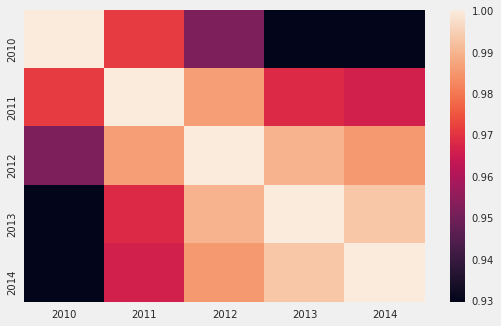

In [5]:
sns.heatmap(data.corr())
plt.show()

# <h1 style="font-size:40px">Report of Data</h1>

In [6]:
report = ProfileReport(data)

In [7]:
report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



# <h1 style="font-size:40px">Checking null and duplicate values</h1>

In [8]:
#checking for null values

data.isnull().sum()

Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

In [9]:
#dropping duplicates

data = data.drop_duplicates()

# <h1 style="font-size:40px">Distribution of the Variables</h1>

In [10]:
px.box(data.drop(['Country Name','Country Code'], axis=1))

# <h1 style="font-size:40px">Asian Countries</h1>

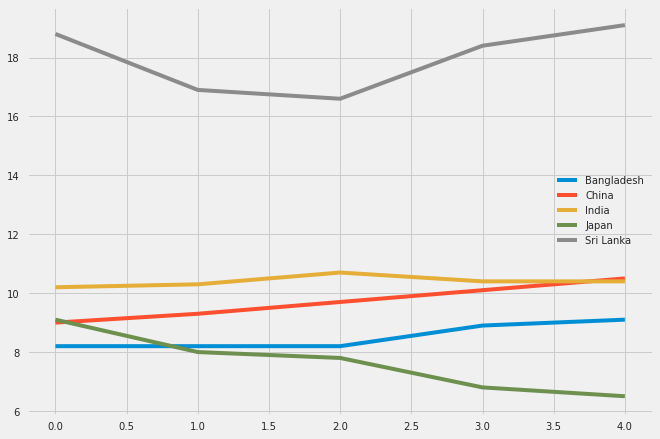

In [11]:
asian_countries = ['India', 'China', 'Sri Lanka','Japan','Bangladesh']

df = data[data['Country Name'].isin(asian_countries)].reset_index(drop=True)

plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    lst = df.iloc[i].tolist()[2:]
    plt.plot([0,1,2,3,4], lst, label=df['Country Name'][i])
    
plt.legend()
plt.show()

# <h1 style="font-size:40px">African Countries</h1>

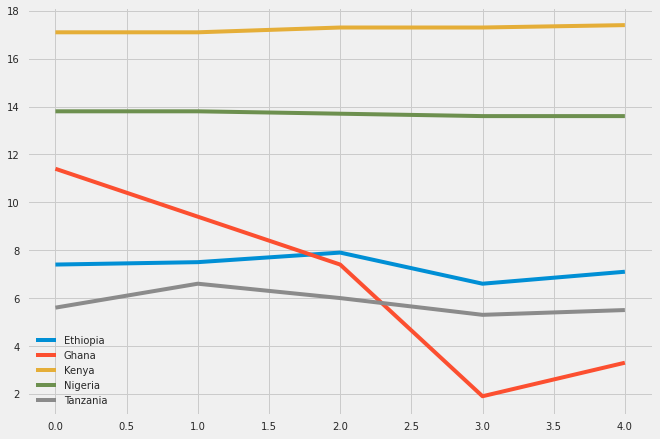

In [12]:
african_countries = ['Nigeria', 'Kenya', 'Ghana','Ethiopia','Tanzania']

df = data[data['Country Name'].isin(african_countries)].reset_index(drop=True)

plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    lst = df.iloc[i].tolist()[2:]
    plt.plot([0,1,2,3,4], lst, label=df['Country Name'][i])
    
plt.legend()
plt.show()

# <h1 style="font-size:40px">North American Countries</h1>

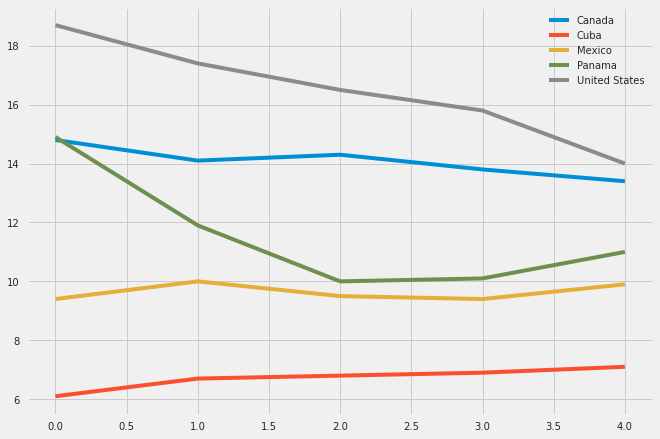

In [13]:
north_american_countries = ['United States', 'Canada', 'Panama','Mexico','Cuba']

df = data[data['Country Name'].isin(north_american_countries)].reset_index(drop=True)

plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    lst = df.iloc[i].tolist()[2:]
    plt.plot([0,1,2,3,4], lst, label=df['Country Name'][i])
    
plt.legend()
plt.show()

# <h1 style="font-size:40px">US states unemployment data</h1>

In [14]:
data = pd.read_csv('../input/unemployment-by-county-us/output.csv')
pd.options.plotting.backend = 'plotly'

## Which county have highest unemployment rate? ---> San Juan County

In [15]:
df = data.loc[:,['County', 'Rate']]
df['maxrating'] = df.groupby('County')['Rate'].transform('max')
df = df.drop('Rate', axis=1).drop_duplicates().sort_values('maxrating', ascending=False).head(6)

df.plot(x='County', y='maxrating', kind='bar', color='maxrating')

### County unemployment rates per year

In [16]:
df = data.loc[:,['Year', 'County', 'Rate']]
df['meanrating'] = df.groupby([df.Year, df.County])['Rate'].transform('mean')
df = df.drop('Rate', axis=1).drop_duplicates().sort_values('meanrating', ascending=False)
df = df[df['County'].isin(['San Juan County','Starr County','Sioux County','Presidio County','Maverick County'])]
df = df.sort_values('Year')

fig=px.bar(df,x='County', y="meanrating", animation_frame="Year", 
           animation_group="County", color="County", hover_name="County", range_y=[0,45])
fig.show()

### Which state has highest Unemployment rate? ---> Colorado

In [17]:
df = data.loc[:,['State', 'Rate']]
df['maxrating'] = df.groupby('State')['Rate'].transform('max')
df = df.drop('Rate', axis=1).drop_duplicates().sort_values('maxrating', ascending=False).head(6)

df.plot(x='State', y='maxrating', kind='bar', color='maxrating')

### State unemployment rates per year

In [18]:
df = data.loc[:,['Year', 'State', 'Rate']]
df['meanrating'] = df.groupby([df.Year, df.State])['Rate'].transform('mean')
df = df.drop('Rate', axis=1).drop_duplicates().sort_values('meanrating', ascending=False)
df = df[df['State'].isin(['Colorado','Texas','North Dakota','Arizona','Michigan'])]
df = df.sort_values('Year')

fig=px.bar(df,x='State', y="meanrating", animation_frame="Year", 
           animation_group="State", color="State", hover_name="State", range_y = [0,15])
fig.show()

### Which year saw the highest unemployment? ---> 1992

In [19]:
df = data.loc[:,['Year', 'Rate']]
df['maxrating'] = df.groupby('Year')['Rate'].transform('max')
df = df.drop('Rate', axis=1).drop_duplicates().sort_values('maxrating', ascending=False).head(6)

df.plot(x='Year', y='maxrating', kind='bar', color='maxrating')